In [1]:
import os, csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
SAVE_PATH = r"E:\Sequence_Analysis\20221004 - 284-188 pyBinder 12ca5 vs MDM2\284-188_pyBinder_12ca5_vs_MDM2_Aliq6_2022_10_03-06_05_59_PM"
FILE = os.path.join(SAVE_PATH,'12ca5.csv')
name = '12ca5 Aliquot 6 pyBinder Inclusion List'

In [3]:
data = []
with open(FILE, 'r') as file:
    csv_reader = csv.DictReader(file,delimiter=',')
    for row in csv_reader:
        data.append(row)

In [4]:
RTs = []
Escores = []
mzs = []
ps = []
zs = []
specs = []
for line in data:
    idx = line['Compound'].find('RTime:')
    Escores.append(float(line['Compound'][8:idx-1]))
    RTs.append(float(line['Compound'][idx+7:])/60)   # convert to mins
    mzs.append(float(line['m/z']))
    zs.append(float(line['z']))
    ps.append(float(line['p value']))
    specs.append(line['specificity'])
    
RT_ranges = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs]   # method is 120 mins, MS on at 3 mins

### if using "inclusion list" file

# for line in data:
#     idx = line['Compound'].find('RTime:')
#     idx_e = line['Compound'].find('p value')
#     Escores.append(float(line['Compound'][8:idx_e-1]))
#     RTs.append(float(line['Compound'][idx+7:])/60)   # convert to mins
#     mzs.append(float(line['m/z']))
#     zs.append(float(line['z']))
#     ps.append(float(line['Compound'][idx_e+9:idx-1]))
    
# RT_ranges = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs]   # method is 120 mins, MS on at 3 mins

In [5]:
dataframe = pd.DataFrame([Escores,RTs,mzs,zs,ps,specs]).transpose()
dataframe.columns = ['Escore','RT','mz','z','p','spec']
dataframe

,Escore,RT,mz,z,p,spec
0,1.0,20.7131,482.5552,3.0,0.030306,12ca5
1,1.0,21.6923,482.5553,3.0,0.030306,12ca5
2,1.0,21.006,482.5553,3.0,0.030306,12ca5
3,1.0,21.415517,482.5554,3.0,0.030306,12ca5
4,1.0,22.6727,482.5556,3.0,0.030306,12ca5
...,...,...,...,...,...,...
2933,0.55,40.83885,801.4093,2.0,0.008176,12ca5
2934,0.55,31.25535,483.26,4.0,0.030685,12ca5
2935,0.55,62.412317,445.2407,2.0,0.016376,12ca5
2936,0.54,53.013683,680.3717,2.0,0.077492,12ca5


(array([  2.,   0.,   8.,   0.,  14.,   0.,  14.,   0.,  19.,   0.,  34.,
          0.,   0.,  28.,   0.,  40.,   0.,  42.,   0.,  70.,   0.,  56.,
          0.,  69.,   0.,   0.,  79.,   0.,  85.,   0.,  85.,   0.,  97.,
          0.,  94.,   0., 100.,   0.,   0., 100.,   0.,  97.,   0., 111.,
          0., 102.,   0., 101.,   0.,   0.,  96.,   0.,  93.,   0.,  96.,
          0.,  80.,   0.,  79.,   0.,  74.,   0.,   0.,  51.,   0.,  49.,
          0.,  45.,   0.,  42.,   0.,  37.,   0.,  25.,   0.,   0.,  28.,
          0.,  26.,   0.,  16.,   0.,  26.,   0.,  30.,   0.,  15.,   0.,
          0.,  24.,   0.,  23.,   0.,  27.,   0.,  39.,   0.,  97.,   0.,
        373.]),
 array([0.54  , 0.5446, 0.5492, 0.5538, 0.5584, 0.563 , 0.5676, 0.5722,
        0.5768, 0.5814, 0.586 , 0.5906, 0.5952, 0.5998, 0.6044, 0.609 ,
        0.6136, 0.6182, 0.6228, 0.6274, 0.632 , 0.6366, 0.6412, 0.6458,
        0.6504, 0.655 , 0.6596, 0.6642, 0.6688, 0.6734, 0.678 , 0.6826,
        0.6872, 0.6918, 0.6964

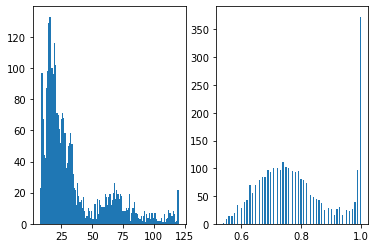

In [6]:
bins = 120

fig,axs = plt.subplots(1,2)
axs[0].hist(RTs,bins=bins)
axs[1].hist(Escores,bins=100)

In [7]:
# fig, axs = plt.subplots(1,1,figsize=(16,16))
# for i,pair in enumerate(RT_ranges):
#     axs.plot([pair[0],pair[1]],[mzs[i],mzs[i]])
#     axs.scatter(RTs[i],mzs[i], s=8)

In [8]:
RT_start = 3
RT_end = 120
n_bins = RT_end - RT_start + 1
peps_min = 1

hist,bins = np.histogram(RTs,bins=np.linspace(RT_start,RT_end,n_bins),density=False)
print(bins)
    
bin_members = np.digitize(RTs,bins=np.linspace(RT_start,RT_end,n_bins))
unique_members = np.unique(bin_members)
idxs_filtered = []
for member in unique_members:
    repeats = np.where(bin_members == member)[0]
    idxs = repeats.copy()
    scores_sub = [Escores[v] for v in repeats]
    if len(repeats) > peps_min:
        scores_sub_sorted = np.sort(scores_sub)   # sort from lowest to highest
        while len(scores_sub) > peps_min:
            delete = np.where(scores_sub == scores_sub_sorted[0])[0][0]
            scores_sub = np.delete(scores_sub,delete)
            idxs = np.delete(idxs,delete)
            scores_sub_sorted = np.delete(scores_sub_sorted,0)
    idxs_filtered.append(idxs)

[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120.]


In [9]:
idxs_flattened = [val for sublist in idxs_filtered for val in sublist]
RTs_filtered = [RTs[i] for i in idxs_flattened]
Escores_filtered = [Escores[i] for i in idxs_flattened]
mzs_filtered = [mzs[i] for i in idxs_flattened]
zs_filtered = [zs[i] for i in idxs_flattened]
ps_filtered = [ps[i] for i in idxs_flattened]
t_starts = [RT - 10 for RT in RTs_filtered]
t_ends = [RT + 10 for RT in RTs_filtered]

(array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 0., 1., 1., 1., 0., 2.,
        0., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 2., 0., 2., 0., 2., 1., 0., 1., 1., 1., 1., 1., 0., 1., 2., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 0., 1., 2.,
        1., 0., 1., 1., 1., 1., 1., 1., 0., 2., 1., 0., 1., 2., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 0., 1.,
        2.]),
 array([  7.88691667,   8.82160944,   9.75630222,  10.690995  ,
         11.62568778,  12.56038056,  13.49507333,  14.42976611,
         15.36445889,  16.29915167,  17.23384444,  18.16853722,
         19.10323   ,  20.03792278,  20.97261556,  21.90730833,
         22.84200111,  23.77669389,  24.71138667,  25.64607944,
         26.58077222,  27.515465  ,  28.45015778,  29.38485056,
         30.31954333,  31.25423611,  32.18892889,  33.12362167,
      

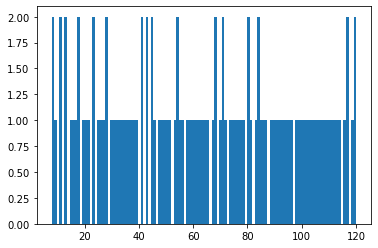

In [10]:
plt.hist(RTs_filtered,bins=120)

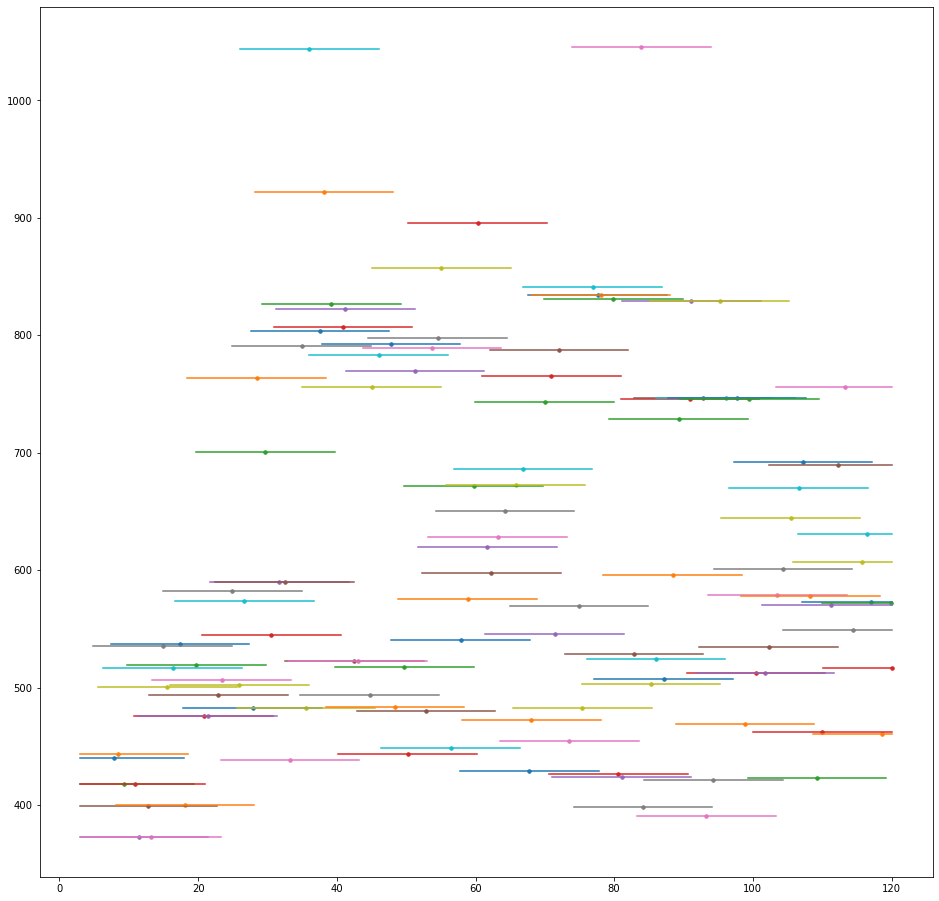

In [11]:
fig, axs = plt.subplots(1,1,figsize=(16,16))
RT_ranges_filtered = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs_filtered]   # method is 120 mins, MS on at 3 mins
for i,pair in enumerate(RT_ranges_filtered):
    axs.plot([pair[0],pair[1]],[mzs_filtered[i],mzs_filtered[i]])
    axs.scatter(RTs_filtered[i],mzs_filtered[i], s=12)
    axs.grid()

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  5.,  0.,  0.,  1.,
         0.,  0.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  5.,  0.,  3.,
         0.,  0.,  1.,  0.,  0.,  3.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,
         4.,  0.,  0.,  8.,  0.,  2.,  0.,  0.,  6.,  0.,  0.,  4.,  0.,
         4.,  0.,  0.,  6.,  0.,  0.,  7.,  0., 29.]),
 array([0.63  , 0.6337, 0.6374, 0.6411, 0.6448, 0.6485, 0.6522, 0.6559,
        0.6596, 0.6633, 0.667 , 0.6707, 0.6744, 0.6781, 0.6818, 0.6855,
        0.6892, 0.6929, 0.6966, 0.7003, 0.704 , 0.7077, 0.7114, 0.7151,
        0.7188, 0.7225, 0.7262, 0.7299, 0.7336, 0.7373, 0.741 , 0.7447,
        0.7484, 0.7521, 0.7558, 0.7595, 0.7632, 0.7669, 0.7706, 0.7743,
        0.778 , 0.7817, 0.7854, 0.7891, 0.7928, 0.7965, 0.8002, 0.8039,
  

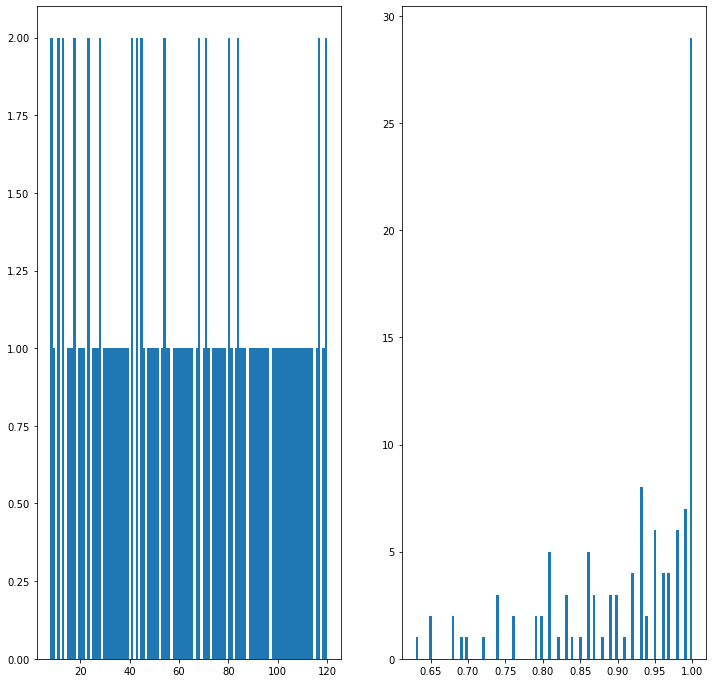

In [12]:
bins = 120

fig,axs = plt.subplots(1,2,figsize=(12,12))
axs[0].hist(RTs_filtered,bins=bins)
axs[1].hist(Escores_filtered,bins=100)

In [13]:
print(len(RTs),len(RTs_filtered))

2938 114


In [14]:
df = pd.DataFrame(columns=('Compound', 'Formula','Adduct','m/z','z','t start (min)','t stop (min)'))
for j,score in enumerate(Escores_filtered):
    A = 'EScore: ' + str(np.round(score,2)) + ' p value: ' + "{:.3e}".format(ps_filtered[j]) + ' RTime: ' + str(np.round(RTs_filtered[j],3))
    B = None
    C = '(no adduct)'
    D = np.round(mzs_filtered[j],4)
    E = int(zs_filtered[j])
    F = max(0,int(RTs_filtered[j] - 10))
    G = min(int(RTs_filtered[j] + 10),120)
    df.loc[j] = [A,B,C,D,E,F,G]
df.to_csv(os.path.join(SAVE_PATH,name + '.csv'),index=False)

## No Filtering

In [15]:
df = pd.DataFrame(columns=('Compound', 'Formula','Adduct','m/z','z','t start (min)','t stop (min)'))
for j,score in enumerate(Escores):
    A = 'EScore: ' + str(np.round(score,2)) + ' p value: ' + "{:.3e}".format(ps[j]) + ' RTime: ' + str(np.round(RTs[j],3))
    B = None
    C = '(no adduct)'
    D = np.round(mzs[j],4)
    E = int(zs[j])
    F = max(0,int(RTs[j] - 10))
    G = min(int(RTs[j] + 10),120)
    df.loc[j] = [A,B,C,D,E,F,G]
df.to_csv(os.path.join(SAVE_PATH,name + ' Not Filtered.csv'),index=False)

## Size excluding 

In [35]:
prot = '12ca5'
FILE_AREAS = os.path.join(SAVE_PATH,f'{prot} Full Output.csv')
name = f'{prot} Aliquot 6 pyBinder Inclusion List'
area_min = 1e7
escore_min = 0.7
prot_idx = 0

In [36]:
data = []
with open(FILE_AREAS, 'r') as file:
    csv_reader = csv.DictReader(file,delimiter=',')
    for row in csv_reader:
        data.append(row)

In [37]:
RTs = []
Escores = []
mzs = []
ps = []
zs = []
specs = []
areas = []
for line in data:
    if prot in line['specificity']:
        idx = line['Compound'].find('RTime:')
        Escores.append(float(line['Compound'][8:idx-1]))
        RTs.append(float(line['Compound'][idx+7:])/60)   # convert to mins
        mzs.append(float(line['m/z']))
        zs.append(float(line['z']))
        ps.append(float(line['p value']))
        specs.append(line['specificity'])
        areas.append(line['areas'])
    
RT_ranges = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs]   # method is 120 mins, MS on at 3 mins

### if using "inclusion list" file

# for line in data:
#     idx = line['Compound'].find('RTime:')
#     idx_e = line['Compound'].find('p value')
#     Escores.append(float(line['Compound'][8:idx_e-1]))
#     RTs.append(float(line['Compound'][idx+7:])/60)   # convert to mins
#     mzs.append(float(line['m/z']))
#     zs.append(float(line['z']))
#     ps.append(float(line['Compound'][idx_e+9:idx-1]))
    
# RT_ranges = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs]   # method is 120 mins, MS on at 3 mins

In [38]:
areas_split = [area[1:-1].split(',') for area in areas]
areas_fix = [[float(val) for val in sub_fixed] for sub_fixed in areas_split]

In [39]:
df = pd.DataFrame(columns=('Compound', 'Formula','Adduct','m/z','z','t start (min)','t stop (min)'))
for j,(rt,score,mz,p,z,area) in enumerate(zip(RTs,Escores,mzs,ps,zs,areas_fix)):
    areas_test = area[3*prot_idx:3*(prot_idx+1)]
    if np.average(areas_test) > area_min and score > escore_min:
        A = f'EScore: {str(np.round(score,2))} p value: {"{:.3e}".format(p)} RTime: {str(np.round(rt,3))} ave_area: {"{:.1e}".format(np.round(np.average(areas_test),0))}'
        B = None
        C = '(no adduct)'
        D = np.round(mz,4)
        E = int(z)
        F = max(0,int(rt - 10))
        G = min(int(rt + 10),120)
        df.loc[j] = [A,B,C,D,E,F,G]
df.to_csv(os.path.join(SAVE_PATH,name + ' Area Filter.csv'),index=False)

## Area Ranking -- Doesn't work lmao

In [29]:
RT_start = 3
RT_end = 120
n_bins = RT_end - RT_start + 1
peps_min = 1
areas_prot = [max(area[3*prot_idx:3*(prot_idx+1)]) for area in areas_fix]

hist,bins = np.histogram(RTs,bins=np.linspace(RT_start,RT_end,n_bins),density=False)
print(bins)
    
bin_members = np.digitize(RTs,bins=np.linspace(RT_start,RT_end,n_bins))
unique_members = np.unique(bin_members)
idxs_filtered = []
for member in unique_members:
    repeats = np.where(bin_members == member)[0]
    idxs = repeats.copy()
    areas_sub = [areas_prot[v] for v in repeats]
    if len(repeats) > peps_min:
        areas_sub_sorted = np.sort(areas_sub)   # sort from lowest to highest
        while len(areas_sub) > peps_min:
            delete = np.where(areas_sub == areas_sub_sorted[0])[0][0]
            areas_sub = np.delete(areas_sub,delete)
            idxs = np.delete(idxs,delete)
            areas_sub_sorted = np.delete(areas_sub_sorted,0)
    idxs_filtered.append(idxs)

[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120.]


In [30]:
idxs_flattened = [val for sublist in idxs_filtered for val in sublist]
RTs_filtered = [RTs[i] for i in idxs_flattened]
Escores_filtered = [Escores[i] for i in idxs_flattened]
mzs_filtered = [mzs[i] for i in idxs_flattened]
zs_filtered = [zs[i] for i in idxs_flattened]
ps_filtered = [ps[i] for i in idxs_flattened]
t_starts = [RT - 10 for RT in RTs_filtered]
t_ends = [RT + 10 for RT in RTs_filtered]
areas_filtered = [areas_fix[i] for i in idxs_flattened]

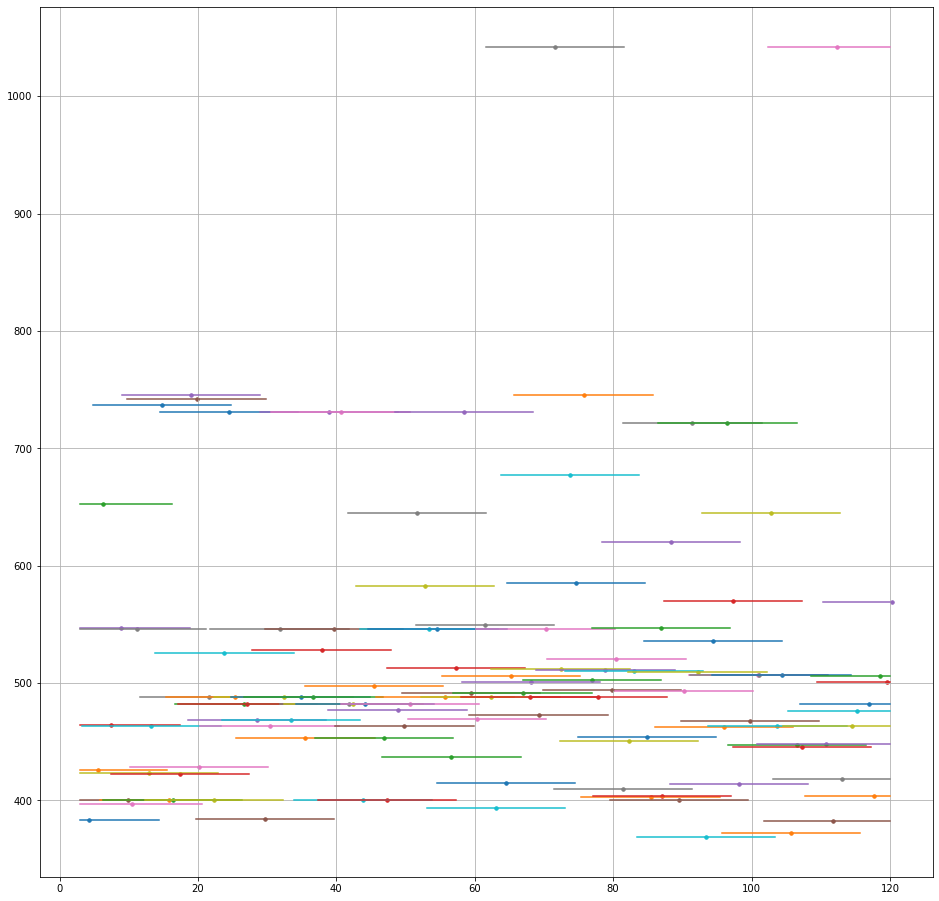

In [31]:
fig, axs = plt.subplots(1,1,figsize=(16,16))
RT_ranges_filtered = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs_filtered]   # method is 120 mins, MS on at 3 mins
for i,pair in enumerate(RT_ranges_filtered):
    axs.plot([pair[0],pair[1]],[mzs_filtered[i],mzs_filtered[i]])
    axs.scatter(RTs_filtered[i],mzs_filtered[i], s=12)
    axs.grid()

In [32]:
df = pd.DataFrame(columns=('Compound', 'Formula','Adduct','m/z','z','t start (min)','t stop (min)'))
for j,(rt,score,mz,p,z,area) in enumerate(zip(RTs,Escores,mzs,ps,zs,areas_fix)):
    A = 'EScore: ' + str(np.round(score,2)) + ' p value: ' + "{:.3e}".format(p) + ' RTime: ' + str(np.round(rt,3))
    B = None
    C = '(no adduct)'
    D = np.round(mz,4)
    E = int(z)
    F = max(0,int(rt - 10))
    G = min(int(rt + 10),120)
    F = area
    df.loc[j] = [A,B,C,D,E,F,G]
df.to_csv(os.path.join(SAVE_PATH,name + ' Area Ranking.csv'),index=False)